In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data 
root='/gpfs/bbp.cscs.ch/data/scratch/proj9/bisimplices/simulations/'
sims=["BlobStimReliability_O1v5-SONATA_Baseline",
      "BlobStimReliability_O1v5-SONATA_RecipRemoval_StructDim56",
      "BlobStimReliability_O1v5-SONATA_RecipRemoval_StructDim56_456",
      "BlobStimReliability_O1v5-SONATA_RecipRemoval_StructDim456",
      "BlobStimReliability_O1v5-SONATA_RecipRemoval_Unstruct-0",
      "BlobStimReliability_O1v5-SONATA_RecipRemoval_Unstruct-1",
      "BlobStimReliability_O1v5-SONATA_RecipRemoval_Unstruct-2",
      "BlobStimReliability_O1v5-SONATA_RecipRemoval_Unstruct-3",
      "BlobStimReliability_O1v5-SONATA_ConnRewired_mc2EE_Order1",
      "BlobStimReliability_O1v5-SONATA_ConnRewired_mc2EE_Order2",
      "BlobStimReliability_O1v5-SONATA_ConnRewired_mc2EE_Order3",
      "BlobStimReliability_O1v5-SONATA_ConnRewired_mc2EE_Order4",
      "BlobStimReliability_O1v5-SONATA_ConnRewired_mc2EE_Order5"]
models=["Baseline",
        "RC_56",
        "RC_56_456",
        "RC_456",
        "RC-0",
        "RC-1",
        "RC-2",
        "RC-3",
        "Order1",
        "Order2",
        "Order3",
        "Order4",
        "Order5"]
mean_rels={}
rels={}
for i, sim_name in enumerate(sims):
    rel_path=f'{root}{sim_name}/working_dir/reliability_bootstrap.pkl'
    rels[models[i]]=pd.read_pickle(rel_path)
    mean_rels[models[i]]=rels[models[i]].drop('gid',axis=1).mean(axis=1)

In [3]:
#Single round computation results 
import pickle
# Loading computed reliabilities 
with open('/gpfs/bbp.cscs.ch/project/proj102/egas/reliability/reliability_file.pkl', 'rb') as fp:
    rels_single = pickle.load(fp)

mask=np.isnan(rels_single['baseline_0'])

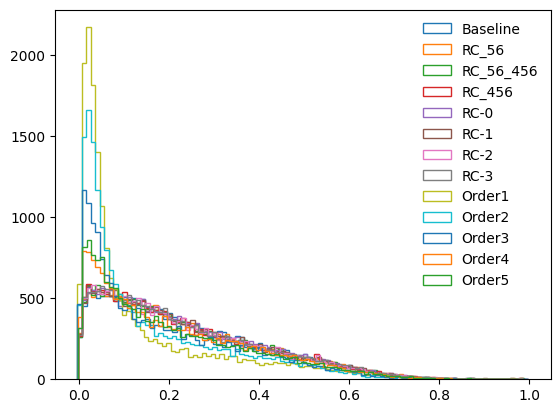

In [4]:
fig, axs = plt.subplots()

for model in models:
    axs.hist(mean_rels[model], histtype='step', label=model, bins=100)
    axs.legend(frameon=False)

Text(0, 0.5, 'Mean centered')

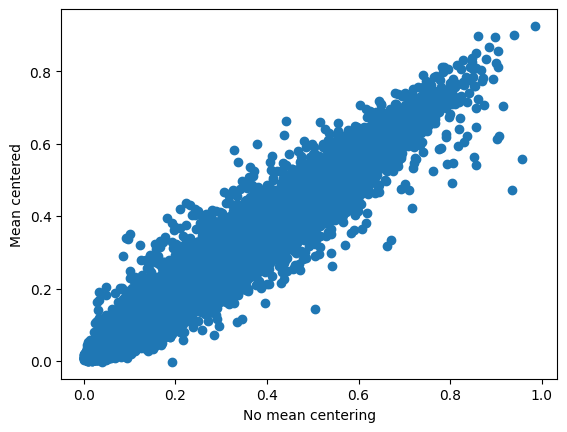

In [5]:
plt.scatter(rels_single['baseline_1'], mean_rels["Baseline"])
plt.xlabel("No mean centering") 
plt.ylabel("Mean centered")